In [1]:
import pandas as pd
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
df=data[data["country"]=="us"].sort_index(level="datetime")
df = df.dropna(subset=['datetime'])
df = df.sort_values(by='datetime').reset_index(drop=True)
df=df.dropna()

C:\Users\mich0\AppData\Local\Temp\ipykernel_15168\2456746146.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


In [4]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Span
from bokeh.io import output_notebook

# Tell Bokeh to render inline in the notebook
output_notebook()

# === Load & Clean Data ===
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
df = data[data["country"] == "us"].dropna(subset=['datetime'])
df['year'] = df['datetime'].dt.year
year_counts = df['year'].value_counts().sort_index()

sightings_source = ColumnDataSource(data=dict(
    year=year_counts.index.tolist(),
    count=year_counts.values.tolist()
))

# === Annotated Media Events ===
alien_media = {
    1951: ("The Day the Earth Stood Still", "movie"),
    1977: ("Close Encounters", "movie"),
    1979: ("Alien", "movie"),
    1982: ("E.T.", "movie"),
    1986: ("Aliens", "movie"),
    1993: ("The X-Files (TV)", "tv"),
    1996: ("Independence Day", "movie"),
    1998: ("X-Files: The Movie", "tv"),
    2002: ("Signs", "movie"),
    2009: ("District 9", "movie"),
    2014: ("Edge of Tomorrow", "movie")
}

media_data = {
    'year': [], 'count': [], 'title': [], 'type': []
}
for year, (title, typ) in alien_media.items():
    if year in year_counts.index:
        media_data['year'].append(year)
        media_data['count'].append(year_counts[year])
        media_data['title'].append(title)
        media_data['type'].append(typ)

media_source = ColumnDataSource(media_data)

# === Create Bokeh Plot ===
p = figure(
    width=1000, height=500,
    background_fill_color="#0f0f1f", border_fill_color="#0f0f1f",
    title="U.S. UFO Sightings with Major Alien Media Releases",
    x_axis_label=None, y_axis_label=None,
    x_range=(min(year_counts.index)-1, max(year_counts.index)+1),
    tools="", toolbar_location=None
)

p.vbar(x='year', top='count', width=0.8, source=sightings_source,
       color="#00ff99", line_color=None, legend_label="Sightings")

# Neon markers for media events
media_renderer = p.circle(x='year', y='count', size=10,
                          color="#ff3366", alpha=0.9, source=media_source,
                          legend_label="Media Event")

# Tooltip for media events
p.add_tools(HoverTool(
    renderers=[media_renderer],
    tooltips=[("Media", "@title"), ("Year", "@year"), ("Sightings", "@count")],
    mode='mouse'
))

# Styling polish
p.xaxis.major_label_text_color = "#cccccc"
p.yaxis.major_label_text_color = "#cccccc"
p.xaxis.axis_line_color = "#333333"
p.yaxis.axis_line_color = "#333333"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "#222244"
p.title.text_color = "#eeeeee"
p.title.text_font_size = "16pt"
p.title.align = "center"
p.legend.label_text_color = "#cccccc"
p.legend.background_fill_alpha = 0.0
p.legend.location = "top_left"

# This will now render inline
show(p)


Loading BokehJS ...

C:\Users\mich0\AppData\Local\Temp\ipykernel_19168\3631616895.py:10: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


In [5]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook         # ← add this
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.palettes import Category20

# Tell Bokeh to render inline in the notebook
output_notebook()                             # ← and this

# === Load and preprocess data ===
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data["datetime"] = pd.to_datetime(data["datetime"], errors="coerce")
df = data[data["country"] == "us"].dropna(subset=["datetime", "shape"])
df["year"] = df["datetime"].dt.year

# === Compute total sightings per year (all shapes) ===
totals = df.groupby("year").size()
totals = totals[totals.index >= 1960]

# === Full shape distribution (pivot) ===
shape_counts_all = df.groupby(["year", "shape"]).size().unstack(fill_value=0)

# === Select top 5 shapes, group rest as 'uncommon shapes' ===
shape_totals = shape_counts_all.sum().sort_values(ascending=False)
top_shapes = shape_totals.head(5).index
other_shapes = shape_totals.index.difference(top_shapes)

# Create new DataFrame for top 5 + 'uncommon shapes'
shape_counts = shape_counts_all[top_shapes].copy()
shape_counts["uncommon shapes"] = shape_counts_all[other_shapes].sum(axis=1)
shape_counts = shape_counts[shape_counts.index >= 1960]

# === Stack plot source ===
final_shapes = ["uncommon shapes"] + list(top_shapes)
source_data = {"year": shape_counts.index.tolist()}
colors = Category20[20][:len(final_shapes)]
for s in final_shapes:
    source_data[s] = shape_counts[s].values
source = ColumnDataSource(source_data)

# === Emoji map ===
emoji_map = {
    "light": "💡", "triangle": "🔺", "circle": "⭕",
    "fireball": "🔥", "unknown": "❓", "uncommon shapes": "🛸"
}

# === Media events ===
media = {
    1951: "The Day the Earth Stood Still",
    1977: "Close Encounters", 1979: "Alien", 1982: "E.T.",
    1986: "Aliens", 1993: "The X-Files (TV)", 1996: "Independence Day",
    1998: "X-Files: The Movie", 2002: "Signs",
    2009: "District 9", 2014: "Edge of Tomorrow"
}
media_years = [y for y in media if y in totals.index]
media_source = ColumnDataSource(data=dict(
    year=media_years,
    count=[totals[y] for y in media_years],
    title=[media[y] for y in media_years]
))

# === Bokeh figure ===
xmin, xmax = shape_counts.index.min(), shape_counts.index.max()
p = figure(
    width=1000, height=500,
    x_range=(1960, xmax + 3),
    y_range=(0, shape_counts.sum(axis=1).max() * 1.15),
    background_fill_color="#0f0f1f",
    title="U.S. UFO Shape Distribution Over Time (All Shapes)",
    tools="", toolbar_location=None
)

# === Area stack ===
p.varea_stack(
    stackers=final_shapes,
    x="year",
    color=colors,
    legend_label=[f"{emoji_map.get(s, '🛸')} {s}" for s in final_shapes],
    source=source
)
p.legend.items = list(reversed(p.legend.items))

# === Media dots ===
media_renderer = p.circle(
    'year', 'count',
    source=media_source,
    size=12,
    fill_color="#ffd700",
    line_color="white",
    line_width=1.3,
    legend_label="Media Event",
    level="overlay"
)
p.add_tools(HoverTool(
    renderers=[media_renderer],
    tooltips=[("Movie", "@title"), ("Year", "@year"), ("Sightings", "@count")],
    mode="mouse", point_policy="follow_mouse"
))

# === Emojis ===
recent = shape_counts.tail(25)
max_h = recent.sum(axis=1).max()
x_pts, y_pts, emojis, sizes = [], [], [], []
for i, s in enumerate(final_shapes):
    yr = recent[s].idxmax()
    below = recent[final_shapes[:i]].loc[yr].sum()
    band = recent[s].loc[yr]
    x_pts.append(yr)
    y_pts.append(below + band / 2)
    emojis.append(emoji_map.get(s, "🛸"))
    sizes.append(f"{10 + band / max_h * 16 - 4:.0f}pt")

emoji_source = ColumnDataSource(dict(x=x_pts, y=y_pts, emoji=emojis, size=sizes))
p.add_layout(LabelSet(
    x='x', y='y', text='emoji', source=emoji_source,
    text_font_size='size', text_align="center", text_baseline="middle"
))

# === Style ===
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Sightings"
p.xaxis.major_label_text_color = "#cccccc"
p.yaxis.major_label_text_color = "#cccccc"
p.xaxis.axis_line_color = "#333333"
p.yaxis.axis_line_color = "#333333"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "#222244"
p.title.text_color = "#eeeeee"
p.title.text_font_size = "16pt"
p.legend.label_text_color = "#ffffff"
p.legend.background_fill_alpha = 0
p.legend.location = "top_left"
p.legend.label_text_font_size = "9pt"

# This will now display inline in your notebook
show(p)


Loading BokehJS ...

C:\Users\mich0\AppData\Local\Temp\ipykernel_19168\3367029534.py:11: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


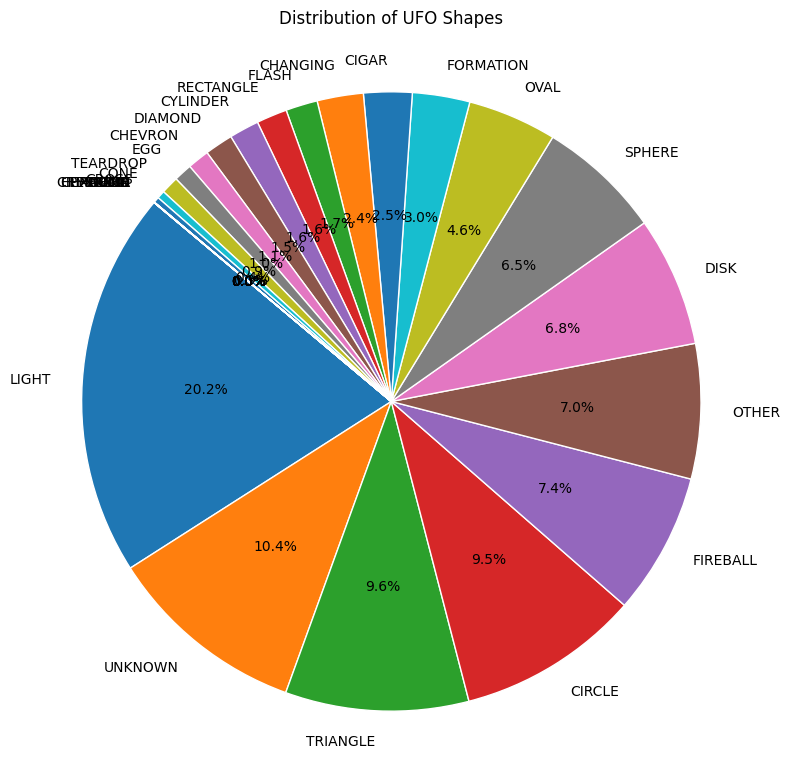

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (adjust path if needed)
df = pd.read_csv(
    'data/complete.csv',
    engine='python',
    on_bad_lines='skip',
    dtype=str
)

# Normalize shape names
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()

# Count sightings per shape
shape_counts = df['shape'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    shape_counts.values,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Distribution of UFO Shapes')
plt.axis('equal')  # ensures the pie is a circle
plt.tight_layout()
plt.show()


C:\Users\mich0\AppData\Local\Temp\ipykernel_15168\3667945393.py:6: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


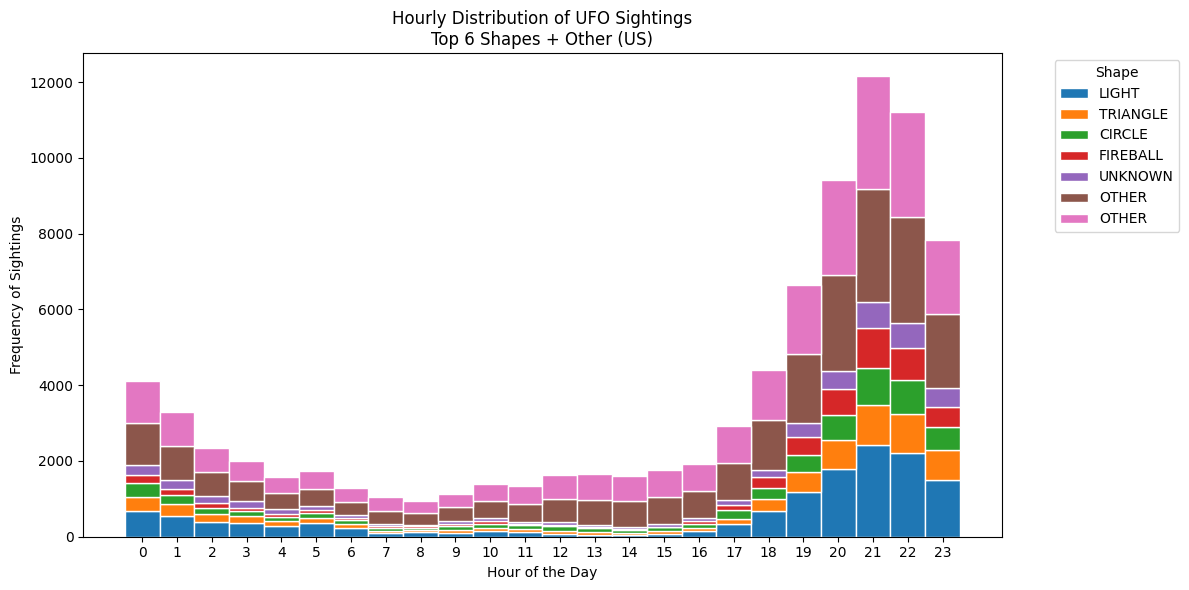

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Load and parse datetimes ———
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# ——— Filter to US and clean ———
df = data[data["country"].str.lower() == "us"].dropna(subset=['datetime']).copy()
df = df.sort_values(by='datetime').reset_index(drop=True)
df = df.dropna()

# ——— Extract hour into the same column as before ———
df['time'] = df['datetime'].dt.hour

# ——— Clean shapes and pick top 6 ———
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()
top6 = df['shape'].value_counts().nlargest(6).index.tolist()

# ——— Build a counts table: each hour × each shape ———
counts = (
    df
    .groupby(['time','shape'])
    .size()
    .unstack(fill_value=0)
)

# ——— Aggregate all non-top-6 into an “OTHER” category ———
others = counts.drop(columns=top6, errors='ignore').sum(axis=1)
counts = counts[top6].copy()
counts['OTHER'] = others

# ——— Prepare for a stacked‐bar: hours 0–23 ———
hours = np.arange(0, 24)
bins = np.arange(0, 25)  # edges for plotting

# Ensure every hour appears
counts = counts.reindex(hours, fill_value=0)

# ——— Plot ———
plt.figure(figsize=(12, 6))

bottom = np.zeros_like(hours, dtype=int)
colors = plt.get_cmap('tab10').colors

for i, shape in enumerate(top6 + ['OTHER']):
    vals = counts[shape].values
    plt.bar(
        hours,
        vals,
        bottom=bottom,
        width=1,
        label=shape,
        color=colors[i % len(colors)],
        edgecolor='white'
    )
    bottom += vals

plt.xticks(hours)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Sightings')
plt.title('Hourly Distribution of UFO Sightings\nTop 6 Shapes + Other (US)')
plt.legend(title='Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\mich0\AppData\Local\Temp\ipykernel_15168\1094562501.py:6: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


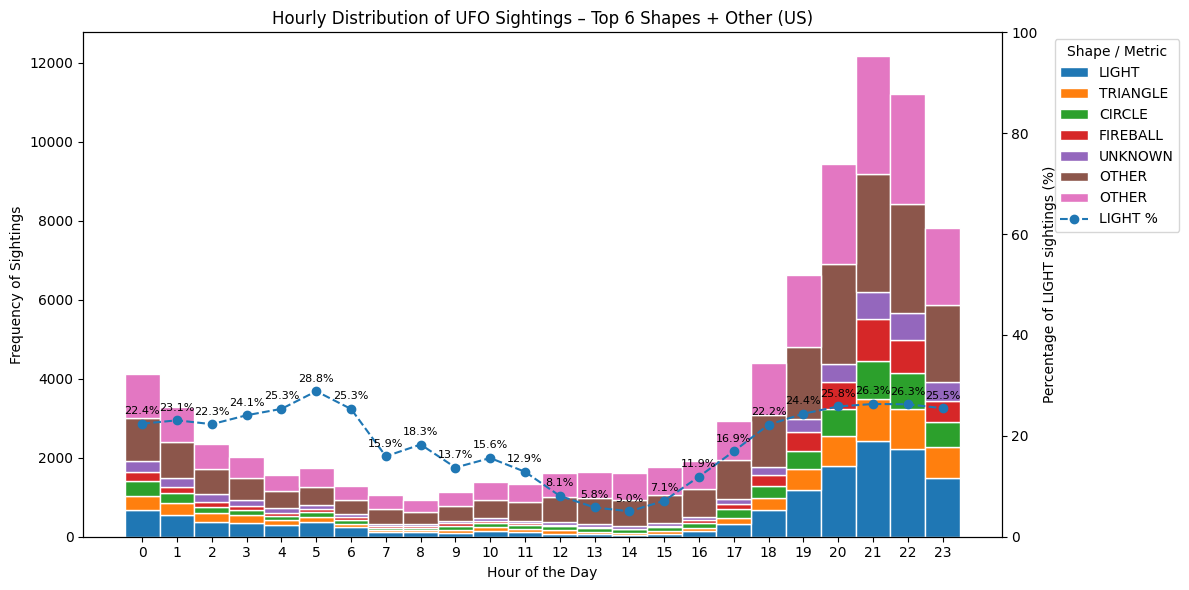

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Load and parse datetimes ———
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# ——— Filter to US and clean ———
df = (
    data[data["country"].str.lower() == "us"]
    .dropna(subset=['datetime'])
    .copy()
    .sort_values(by='datetime')
    .reset_index(drop=True)
)
df = df.dropna()  # drop rows with missing values

# ——— Extract hour and normalize shape ———
df['time']  = df['datetime'].dt.hour
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()

# ——— Identify top 6 shapes and build counts table ———
top6 = df['shape'].value_counts().nlargest(6).index.tolist()
counts = (
    df
    .groupby(['time','shape'])
    .size()
    .unstack(fill_value=0)
)
others = counts.drop(columns=top6, errors='ignore').sum(axis=1)
counts = counts[top6].copy()
counts['OTHER'] = others

# ——— Ensure hours 0–23 are present ———
hours = np.arange(0, 24)
counts = counts.reindex(hours, fill_value=0)

# ——— Compute LIGHT percentages per hour ———
total_per_hour = counts.sum(axis=1)
light_pct = counts['LIGHT'] / total_per_hour * 100

# ——— Plot stacked bars for frequencies ———
fig, ax1 = plt.subplots(figsize=(12, 6))
bottom = np.zeros_like(hours, dtype=int)
colors = plt.get_cmap('tab10').colors
for i, shape in enumerate(top6 + ['OTHER']):
    vals = counts[shape].values
    ax1.bar(
        hours,
        vals,
        bottom=bottom,
        width=1,
        label=shape,
        color=colors[i % len(colors)],
        edgecolor='white'
    )
    bottom += vals

ax1.set_xticks(hours)
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency of Sightings')
ax1.set_title('Hourly Distribution of UFO Sightings – Top 6 Shapes + Other (US)')

# ——— Plot LIGHT % on the same hours, with annotations ———
ax2 = ax1.twinx()
ax2.plot(
    hours,
    light_pct,
    marker='o',
    linestyle='--',
    linewidth=1.5,
    label='LIGHT %'
)
ax2.set_ylabel('Percentage of LIGHT sightings (%)')
ax2.set_ylim(0, 100)

# Annotate each point with its percentage
for hr, pct in zip(hours, light_pct):
    ax2.text(
        hr, pct + 1.5,           # slight vertical offset
        f"{pct:.1f}%",           # one decimal place
        ha='center', va='bottom',
        fontsize=8
    )

# ——— Combine legends and show ———
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    title='Shape / Metric',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.palettes import Category20

# Render inline
output_notebook()

# === Load & preprocess ===
data = pd.read_csv("data/complete.csv", on_bad_lines='skip')
data["datetime"] = pd.to_datetime(data["datetime"], errors="coerce")
df = (
    data[data["country"].str.lower() == "us"]
    .dropna(subset=["datetime", "shape"])
    .copy()
)
df["year"] = df["datetime"].dt.year

# === Totals from 1990–2014 ===
totals = df.groupby("year").size()
totals = totals[(totals.index >= 1990) & (totals.index <= 2014)]

# === Shape pivot from 1990–2014 ===
shape_counts_all = df.groupby(["year", "shape"]).size().unstack(fill_value=0)
shape_counts_all = shape_counts_all[
    (shape_counts_all.index >= 1990) &
    (shape_counts_all.index <= 2014)
]

# === Top 5 shapes + “uncommon shapes” ===
shape_totals = shape_counts_all.sum().sort_values(ascending=False)
top_shapes    = shape_totals.head(5).index
other_shapes  = shape_totals.index.difference(top_shapes)

shape_counts = shape_counts_all[top_shapes].copy()
shape_counts["uncommon shapes"] = shape_counts_all[other_shapes].sum(axis=1)

# === Prepare ColumnDataSource ===
final_shapes = ["uncommon shapes"] + list(top_shapes)
source_data  = {"year": shape_counts.index.tolist()}
colors       = Category20[20][:len(final_shapes)]
for s in final_shapes:
    source_data[s] = shape_counts[s].values
source = ColumnDataSource(source_data)

# === Emoji map ===
emoji_map = {
    "light": "💡", "triangle": "🔺", "circle": "⭕",
    "fireball": "🔥", "unknown": "❓", "uncommon shapes": "🛸"
}

# === Media events 1990–2014 ===
media = {
    1951: "The Day the Earth Stood Still",
    1977: "Close Encounters", 1979: "Alien", 1982: "E.T.",
    1986: "Aliens", 1993: "The X-Files (TV)", 1996: "Independence Day",
    1998: "X-Files: The Movie", 2002: "Signs",
    2009: "District 9", 2014: "Edge of Tomorrow"
}
media_years = [y for y in media if 1990 <= y <= 2014 and y in totals.index]
media_source = ColumnDataSource(dict(
    year =[y for y in media_years],
    count=[totals[y] for y in media_years],
    title=[media[y] for y in media_years]
))

# === Figure setup ===
p = figure(
    width=1000, height=500,
    x_range=(1990, 2014),
    y_range=(0, shape_counts.sum(axis=1).max() * 1.15),
    background_fill_color="#0f0f1f",
    title="U.S. UFO Shape Distribution Over Time (1990–2014)",
    tools="", toolbar_location=None
)

# === Stacked area ===
p.varea_stack(
    stackers=final_shapes,
    x="year",
    color=colors,
    legend_label=[f"{emoji_map[s]} {s}" for s in final_shapes],
    source=source
)
p.legend.items = list(reversed(p.legend.items))

# === Media event markers ===
media_renderer = p.circle(
    'year','count', source=media_source,
    size=12, fill_color="#ffd700", line_color="white",
    line_width=1.3, legend_label="Media Event", level="overlay"
)
p.add_tools(HoverTool(
    renderers=[media_renderer],
    tooltips=[("Movie", "@title"), ("Year","@year"), ("Sightings","@count")],
    mode="mouse", point_policy="follow_mouse"
))

# === Emojis ===
recent = shape_counts.tail(25)
max_h  = recent.sum(axis=1).max()
x_pts, y_pts, emojis, sizes = [], [], [], []
for i, s in enumerate(final_shapes):
    yr    = recent[s].idxmax()
    below = recent[final_shapes[:i]].loc[yr].sum()
    band  = recent[s].loc[yr]
    x_pts.append(yr)
    y_pts.append(below + band/2)
    emojis.append(emoji_map[s])
    sizes.append(f"{10 + band/max_h*16 - 4:.0f}pt")

emoji_source = ColumnDataSource(dict(x=x_pts, y=y_pts, emoji=emojis, size=sizes))
p.add_layout(LabelSet(
    x='x', y='y', text='emoji', source=emoji_source,
    text_font_size='size', text_align="center", text_baseline="middle"
))

# === Styling ===
p.xaxis.axis_label            = "Year"
p.yaxis.axis_label            = "Sightings"
p.xaxis.major_label_text_color = "#cccccc"
p.yaxis.major_label_text_color = "#cccccc"
p.xaxis.axis_line_color       = "#333333"
p.yaxis.axis_line_color       = "#333333"
p.xgrid.grid_line_color       = None
p.ygrid.grid_line_color       = "#222244"
p.title.text_color            = "#eeeeee"
p.title.text_font_size        = "16pt"
p.legend.label_text_color     = "#ffffff"
p.legend.background_fill_alpha= 0
p.legend.location             = "top_left"
p.legend.label_text_font_size = "9pt"

# Show it
show(p)


Loading BokehJS ...

C:\Users\mich0\AppData\Local\Temp\ipykernel_15168\466419716.py:11: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/complete.csv", on_bad_lines='skip')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# 1) Load & preprocess
df = pd.read_csv('data/complete.csv', engine='python', on_bad_lines='skip', dtype=str)
df['date']  = pd.to_datetime(df['datetime'], errors='coerce')
df['year']  = df['date'].dt.year
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()
df = df[(df['year'] >= 1990) & (df['year'] <= 2014)]

# 2) Determine all shapes that ever appear in a year’s top-7
years = sorted(df['year'].unique())
top_shapes = set()
for y in years:
    counts = df[df['year'] == y]['shape'].value_counts()
    top7 = counts.index[:7]
    top_shapes.update(top7)
top_shapes = sorted(top_shapes)

# 3) Build a consistent color map using Matplotlib's 'tab20' palette
palette = plt.get_cmap('tab20').colors
color_map = {shape: palette[i % len(palette)] for i, shape in enumerate(top_shapes)}
color_map['Uncommon Shapes'] = (0.7, 0.7, 0.7)  # grey for the uncommon bucket

# 4) Define the plotting function
def plot_year(year):
    counts = df[df['year'] == year]['shape'].value_counts()
    top7 = counts.iloc[:7]
    uncommon_count = counts.iloc[7:].sum()
    
    labels = list(top7.index)
    values = list(top7.values)
    
    if uncommon_count > 0:
        labels.append('Uncommon Shapes')
        values.append(uncommon_count)
    
    colors = [color_map[label] for label in labels]
    
    plt.figure(figsize=(6, 6))
    plt.pie(values,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f'UFO Shapes in {year}')
    plt.axis('equal')
    plt.show()

# 5) Slider widget
slider = IntSlider(
    min=1990, max=2014, step=1, value=1990, 
    description='Year:', continuous_update=False
)

# 6) Link the slider to the plotting function
interact(plot_year, year=slider);


interactive(children=(IntSlider(value=1990, continuous_update=False, description='Year:', max=2014, min=1990),…

In [27]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
from bokeh.palettes import Category20
import pandas as pd
import numpy as np
from math import pi

output_notebook()

# 1) Load & preprocess
df = pd.read_csv('data/complete.csv', on_bad_lines='skip', dtype=str)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['year']  = df['datetime'].dt.year.astype(int)          # ← force int
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()
df = df[(df['year'] >= 1990) & (df['year'] <= 2014)]

# 2) Determine all shapes that ever appear in a year’s top-7
years = list(range(1990, 2015))                           # ← explicit int list
top_shapes = set()
for y in years:
    counts = df[df['year'] == y]['shape'].value_counts()
    top7   = counts.index[:7]
    top_shapes.update(top7)
top_shapes = sorted(top_shapes)

# 3) Build colors
palette   = Category20[20]
color_map = {shape: palette[i % len(palette)] for i, shape in enumerate(top_shapes)}
color_map['Uncommon Shapes'] = "#b0b0b0"

# 4) Prepare per-year start/end angles etc.
data_by_year = {}
for y in years:
    counts        = df[df['year'] == y]['shape'].value_counts()
    top7          = counts.iloc[:7]
    uncommon_cnt  = counts.iloc[7:].sum()
    labels        = list(top7.index)
    values        = list(top7.values)
    if uncommon_cnt > 0:
        labels.append('Uncommon Shapes')
        values.append(uncommon_cnt)

    total   = sum(values)
    angles  = [v/total * 2*pi for v in values]
    starts  = np.cumsum([0] + angles[:-1])
    ends    = starts + angles

    data_by_year[str(y)] = {
        'start_angle':  starts.tolist(),
        'end_angle':    ends.tolist(),
        'label':        labels,
        'color':        [color_map[l] for l in labels]
    }

# 5) Set up Bokeh plot
initial_year = years[0]                                    # ← now an int
source       = ColumnDataSource(data=data_by_year[str(initial_year)])

p = figure(height=400, width=400,
           title=f"UFO Shapes in {initial_year}",
           toolbar_location=None, x_range=(-1,1), y_range=(0,2))
p.wedge(x=0, y=1, radius=0.8,
        start_angle='start_angle', end_angle='end_angle',
        line_color="white", fill_color='color',
        legend_field='label', source=source)
p.axis.visible = False
p.grid.visible = False
p.legend.location = "right"

# 6) Slider + JS callback
slider = Slider(start=years[0], end=years[-1], value=initial_year, step=1, title="Year")
callback = CustomJS(args=dict(source=source,
                              data_by_year=data_by_year,
                              plot=p,
                              slider=slider),
                    code="""
    const year = slider.value.toString();      // e.g. "1995"
    source.data = data_by_year[year];
    plot.title.text = 'UFO Shapes in ' + year;
    source.change.emit();
""")
slider.js_on_change('value', callback)

# 7) Show it!
show(column(slider, p))


Loading BokehJS ...

In [34]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS, LabelSet
from bokeh.layouts import column
from bokeh.palettes import Category20
import pandas as pd
import numpy as np
from math import pi, cos, sin

output_notebook()

# 1) Load & preprocess
df = pd.read_csv('data/complete.csv', on_bad_lines='skip', dtype=str)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['year']  = df['datetime'].dt.year.astype(int)
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()
df = df[(df['year'] >= 1990) & (df['year'] <= 2014)]

# 2) Identify all shapes ever in a year's top-7
years = list(range(1990, 2015))
top_shapes = set()
for y in years:
    cnts = df[df['year']==y]['shape'].value_counts()
    top_shapes |= set(cnts.index[:7])
top_shapes = sorted(top_shapes)

# 3) Color map
palette = Category20[20]
color_map = {shape: palette[i % len(palette)] for i, shape in enumerate(top_shapes)}
color_map['Uncommon Shapes'] = "#b0b0b0"

# 4) Build per-year data, including positions for two labels
data_by_year = {}
for y in years:
    cnts       = df[df['year']==y]['shape'].value_counts()
    top7       = cnts.iloc[:7]
    uncommon   = cnts.iloc[7:].sum()
    labels     = list(top7.index)
    values     = list(top7.values)
    if uncommon > 0:
        labels.append('Uncommon Shapes')
        values.append(uncommon)
    total = sum(values)

    # compute wedge angles
    angles = [v/total * 2*pi for v in values]
    starts = np.cumsum([0] + angles[:-1])
    ends   = starts + angles

    # mid-angles for label placement
    mids   = starts + np.array(angles)/2

    # inside percent labels (radius 0.5)
    x_pct  = 0.5 * np.cos(mids)
    y_pct  = 1   + 0.5 * np.sin(mids)
    pct_text = [f"{v/total*100:1.1f}%" for v in values]

    # outside shape names (radius 1.05)
    x_lab = 1.05 * np.cos(mids)
    y_lab = 1    + 1.05 * np.sin(mids)

    data_by_year[str(y)] = {
        'start_angle':  starts.tolist(),
        'end_angle':    ends.tolist(),
        'color':        [color_map[l] for l in labels],
        'label':        labels,
        'pct_text':     pct_text,
        'x_pct':        x_pct.tolist(),
        'y_pct':        y_pct.tolist(),
        'x_lab':        x_lab.tolist(),
        'y_lab':        y_lab.tolist(),
    }

# 5) Initial plot
initial = years[0]
src     = ColumnDataSource(data_by_year[str(initial)])
p = figure(height=400, width=400,
           title=f"UFO Shapes in {initial}",
           toolbar_location=None,
           x_range=(-1.2,1.2), y_range=(0,2.2))

wedges = p.wedge(x=0, y=1, radius=0.8,
                 start_angle='start_angle', end_angle='end_angle',
                 fill_color='color', line_color='white',
                 source=src)

p.axis.visible = False
p.grid.visible = False

# 6) Percent labels inside
pct_labels = LabelSet(x='x_pct', y='y_pct', text='pct_text',
                      source=src, renderers=[wedges],
                      text_align='center', text_baseline='middle',
                      text_font_size='9pt')
p.add_layout(pct_labels)

# 7) Shape labels outside
name_labels = LabelSet(x='x_lab', y='y_lab', text='label',
                       source=src, renderers=[wedges],
                       text_align='center', text_baseline='middle',
                       text_font_size='9pt', text_font_style='bold')
p.add_layout(name_labels)

# 8) Slider + JS callback
slider = Slider(start=years[0], end=years[-1],
                value=initial, step=1, title="Year")
callback = CustomJS(args=dict(src=src,
                              data_by_year=data_by_year,
                              plot=p,
                              slider=slider), code="""
    const yr = slider.value.toString();
    const d  = data_by_year[yr];
    src.data = d;
    plot.title.text = 'UFO Shapes in ' + yr;
    src.change.emit();
""")
slider.js_on_change('value', callback)

# 9) Show
show(column(slider, p))


Loading BokehJS ...

In [5]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
from bokeh.palettes import Category20
import pandas as pd
import numpy as np
from math import pi, cos, sin

output_notebook()



df = pd.read_csv('data/complete.csv', on_bad_lines='skip', dtype=str)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['year']  = df['datetime'].dt.year.astype(int)
df['shape'] = df['shape'].fillna('UNKNOWN').str.upper()
df = df[(df['year'] >= 1990) & (df['year'] <= 2014)]
# — assume your df is already loaded & cleaned as before, and you have `years`, `top_shapes`, `color_map` —

# Build per‐year angles + label coords
years = list(range(1990, 2015))
top_shapes = set()
for y in years:
    cnts = df[df['year']==y]['shape'].value_counts()
    top_shapes |= set(cnts.index[:7])
top_shapes = sorted(top_shapes)

palette = Category20[20]
color_map = {shape: palette[i % len(palette)] for i, shape in enumerate(top_shapes)}
color_map['Uncommon Shapes'] = "#b0b0b0"

color_map = {shape: palette[i % len(palette)] for i, shape in enumerate(top_shapes)}
color_map['Uncommon Shapes'] = "#b0b0b0"

data_by_year = {}
for y in years:
    cnts      = df[df['year']==y]['shape'].value_counts()
    top7      = cnts.iloc[:7]
    uncommon  = cnts.iloc[7:].sum()
    labels    = list(top7.index)
    values    = list(top7.values)
    if uncommon>0:
        labels.append('Uncommon Shapes')
        values.append(uncommon)
    total = sum(values)

    # wedge angles
    angles = [v/total * 2*pi for v in values]
    starts = np.cumsum([0]+angles[:-1])
    ends   = starts + angles

    # mid‐angle, for label pos
    mids   = starts + np.array(angles)/2
    x_pct  = 0.5 * np.cos(mids)
    y_pct  = 1   + 0.5 * np.sin(mids)
    pct_text = [f"{v/total*100:1.1f}%" for v in values]

    # optional: shape names outside
    x_lab  = 1.05 * np.cos(mids)
    y_lab  = 1    + 1.05 * np.sin(mids)

    data_by_year[str(y)] = {
        'start_angle': starts.tolist(),
        'end_angle':   ends.tolist(),
        'color':       [color_map[l] for l in labels],
        'label':       labels,
        'pct_text':    pct_text,
        'x_pct':       x_pct.tolist(),
        'y_pct':       y_pct.tolist(),
        'x_lab':       x_lab.tolist(),
        'y_lab':       y_lab.tolist(),
    }

# Initial year
initial = years[0]
src     = ColumnDataSource(data_by_year[str(initial)])

p = figure(height=400, width=400,
           title=f"UFO Shapes in {initial}",
           toolbar_location=None,
           x_range=(-1.2,1.2), y_range=(0,2.2))

# draw wedges
p.wedge(x=0, y=1, radius=0.8,
        start_angle='start_angle', end_angle='end_angle',
        fill_color='color', line_color='white',
        source=src)

# draw % texts inside
p.text(x='x_pct', y='y_pct', text='pct_text',
       source=src,
       text_align='center', text_baseline='middle',
       text_font_size='9pt')

# draw shape names outside
p.text(x='x_lab', y='y_lab', text='label',
       source=src,
       text_align='center', text_baseline='middle',
       text_font_size='9pt', text_font_style='bold')

p.axis.visible = False
p.grid.visible = False

# slider + callback
slider = Slider(start=years[0], end=years[-1],
                value=initial, step=1, title="Year")

callback = CustomJS(args=dict(src=src,
                              data_by_year=data_by_year,
                              plot=p,
                              slider=slider), code="""
    const yr = slider.value.toString();
    const d  = data_by_year[yr];
    src.data = d;
    plot.title.text = 'UFO Shapes in ' + yr;
    src.change.emit();
""")
slider.js_on_change('value', callback)

show(column(slider, p))


Loading BokehJS ...